In [1]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/qa1hsyxt66pvj02/opencv_bootcamp_assets_NB10.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB10.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

### Step 1: Read Images

In [7]:
def readImagesAndTimes():
    # list of file names
    filenames = ['img_0.033.jpg', 'img_0.25.jpg', 'img_2.5.jpg', 'img_15.jpg']

    # list of exposure times
    times = np.array([1/30.0, 0.25, 2.5, 25.0], dtype=np.float32)

    # read images
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        images.append(im)

    return images, times

### Step 2: Align Images

In [8]:
# Read images and exposure times
images, times = readImagesAndTimes()

# Align Images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

### Step 3: Estimate Camera Response Function

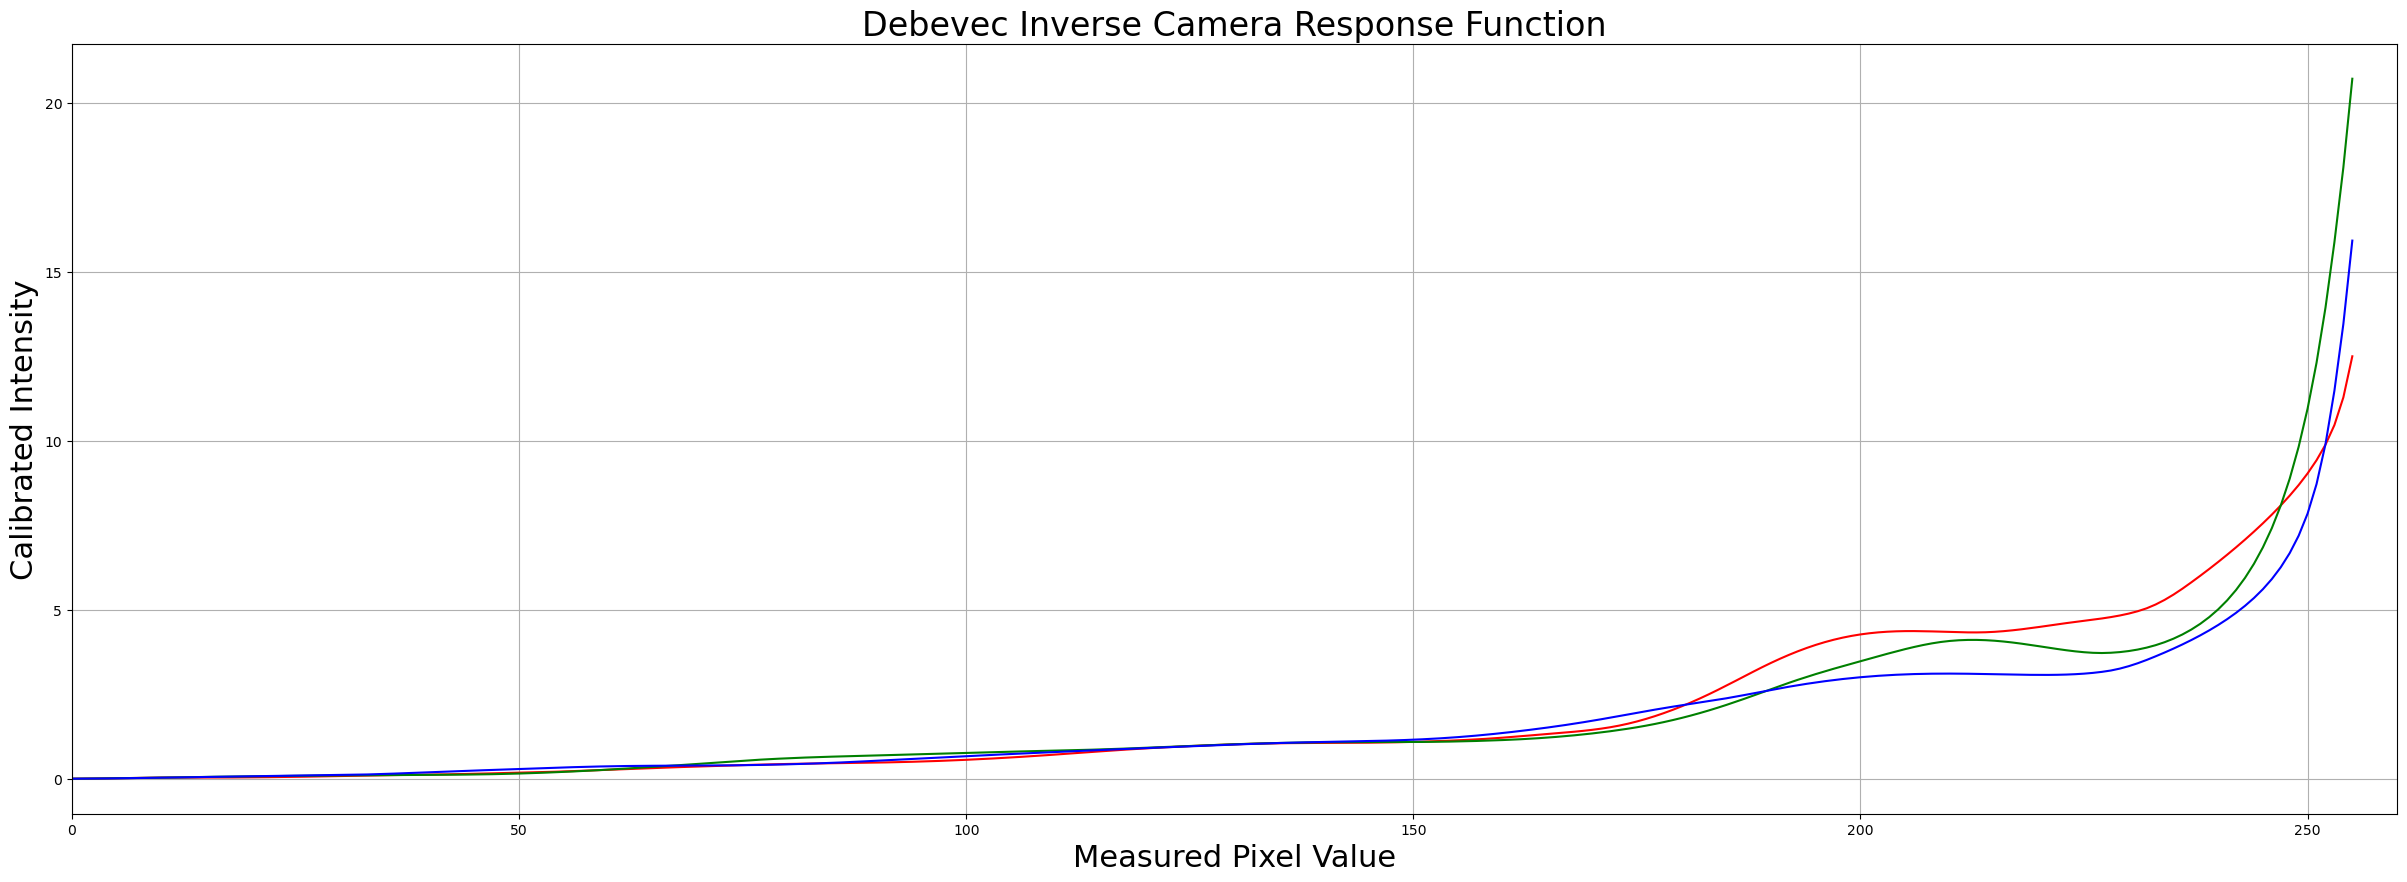

In [11]:
# find camera response function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30,10))
plt.title('Debevec Inverse Camera Response Function', fontsize=24)
plt.xlabel('Measured Pixel Value', fontsize=22)
plt.ylabel('Calibrated Intensity', fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:,0],'r', x, y[:,1],'g', x, y[:,2],'b')

### Step 4: Merge Exposure into an HDR Image

In [12]:
# merge images into HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)


### Step 5: ToneMapping

saved ldr Drago


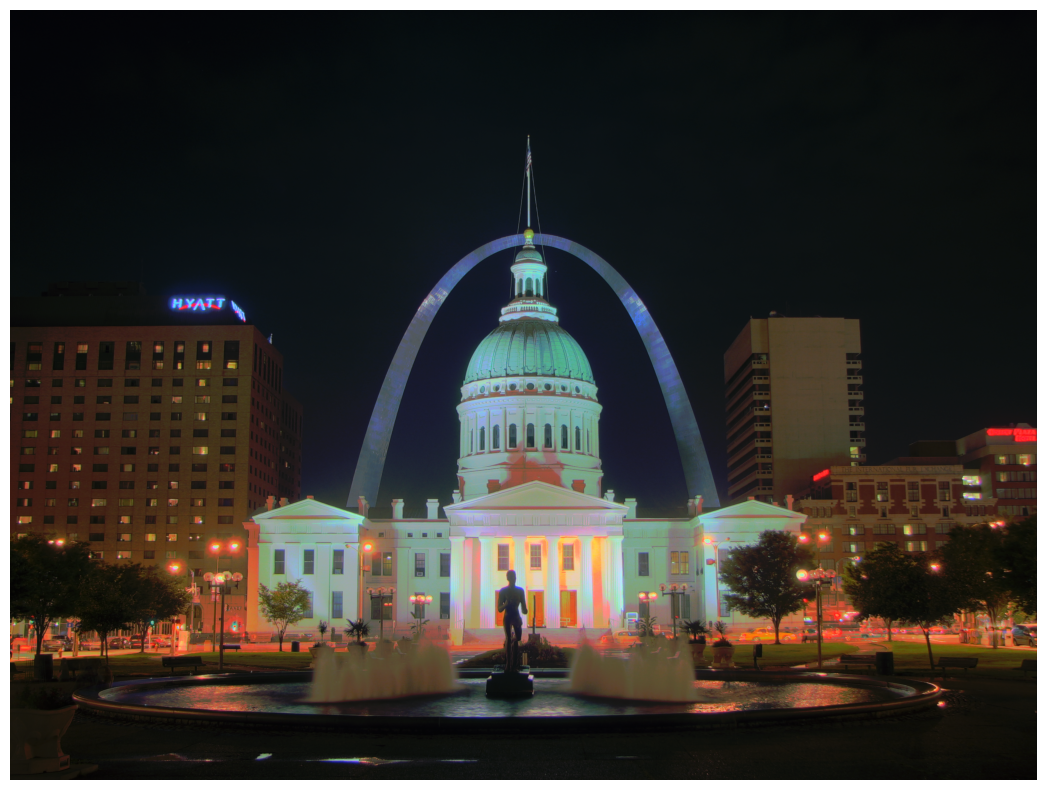

In [13]:
# tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago

plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrDrago,0,1)); plt.axis('off')
cv2.imwrite('ldr-Drago.jpg', ldrDrago * 255)
print('saved ldr Drago')

saved ldr Mantiuk


c:\Users\PMLS\anaconda3\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


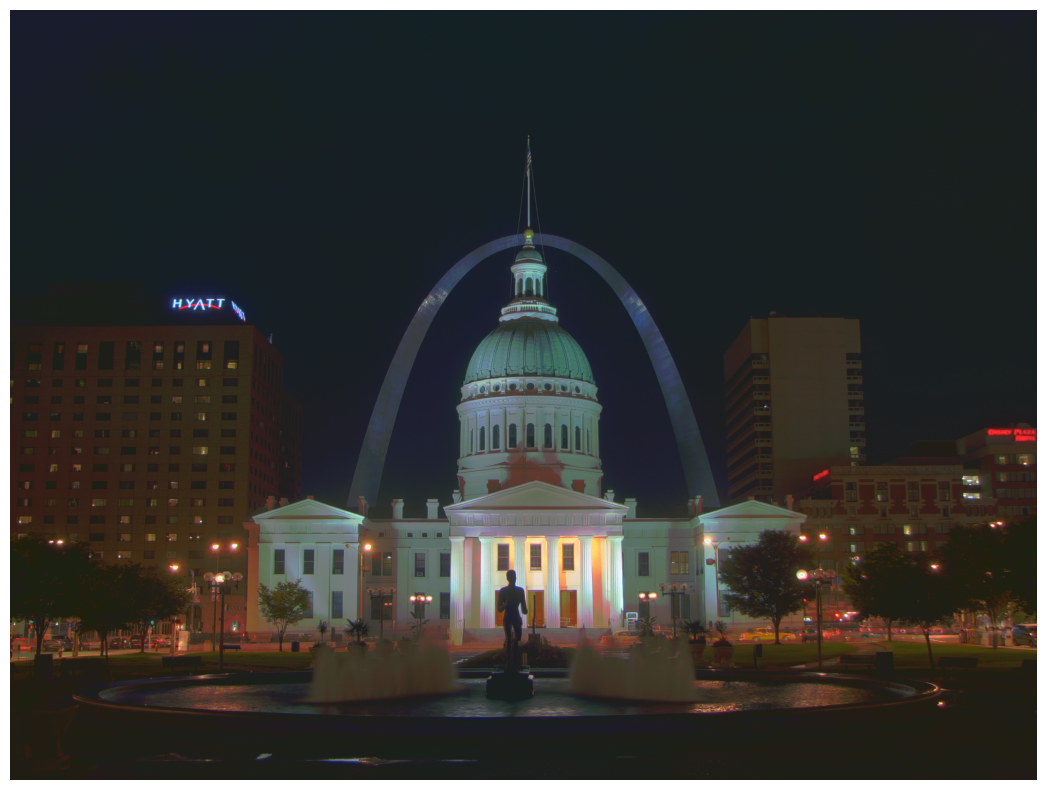

In [14]:
# tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk

plt.figure(figsize=(20,10)); plt.imshow(np.clip(ldrMantiuk,0,1)); plt.axis('off')
cv2.imwrite('ldr-Mantiuk.jpg', ldrMantiuk * 255)
print('saved ldr Mantiuk')